'''
https://github.com/LLNL/macc
'''

The JAG inertial confinement fusion simulation dataset for multi-modal scientific deep learning.

In [1]:
%pip install ipynbname

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Set cwd to the directory 
import os
from pathlib import Path
import ipynbname

HERE = Path(ipynbname.path()).resolve().parent
os.chdir(HERE)
print("Current directory: ", os.getcwd())

Current directory:  C:\Users\384861\github\MORPH\experiments\ft_llnl_jag\icf-jag-10k


In [4]:
import os, numpy as np

path_images = "jag10K_images.npy"
path_params = "jag10K_params.npy"
path_scalars = "jag10K_0_scalars.npy"

images = np.load(path_images, allow_pickle=False)  
params = np.load(path_params, allow_pickle=False)
scalars = np.load(path_scalars, allow_pickle=False)

print("images.shape:", images.shape)
print("params.shape:", params.shape)
print("scalars.shape:", scalars.shape)

images.shape: (10000, 16384)
params.shape: (10000, 5)
scalars.shape: (10000, 15)


In [5]:
# some stats
min_images, max_images = images.min(), images.max()
mean_images, std_images = images.mean(), images.std()
print(f"images: min {min_images}, max {max_images}, mean {mean_images}, std {std_images}")

min_params, max_params = params.min(), params.max()
mean_params, std_params = params.mean(), params.std()
print(f"params: min {min_params}, max {max_params}, mean {mean_params}, std {std_params}")

min_scalars, max_scalars = scalars.min(), scalars.max()
mean_scalars, std_scalars = scalars.mean(), scalars.std()
print(f"scalars: min {min_scalars}, max {max_scalars}, mean {mean_scalars}, std {std_scalars}")

images: min 0.0, max 255.50160217285156, mean 1.0018655061721802, std 4.399370193481445
params: min -0.2999939999999354, max 0.9999943866084912, mean 0.20009702184750694, std 0.33403919837112045
scalars: min 0.0005003230180591345, max 0.9914026856422424, mean 0.30184993147850037, std 0.20122858881950378


Reshaped images: (10000, 64, 64, 4)


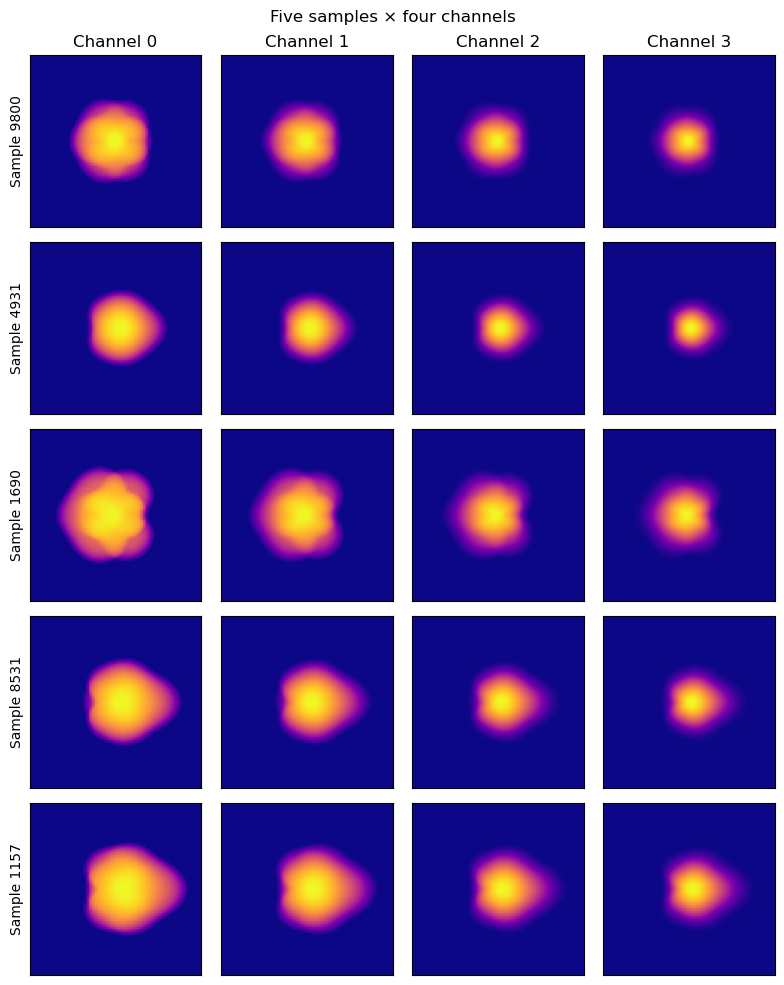

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# If not already reshaped:
images_reshape = images.reshape(images.shape[0], 64, 64, 4)
print(f"Reshaped images: {images_reshape.shape}")  # (N, 64, 64, 4)

# pick 5 unique samples
idxs = np.random.choice(images_reshape.shape[0], 5, replace=False)

fig, axes = plt.subplots(len(idxs), 4, figsize=(8, 2*len(idxs)))

# handle the case axes is 2D
for r, idx in enumerate(idxs):
    for c in range(4):
        ax = axes[r, c]
        ax.imshow(images_reshape[idx, :, :, c], cmap='plasma', origin='lower')
        ax.set_xticks([])
        ax.set_yticks([])
        if r == 0:
            ax.set_title(f'Channel {c}')
        if c == 0:
            ax.set_ylabel(f'Sample {idx}')

plt.suptitle('Five samples × four channels')
plt.tight_layout()
plt.show()